# COGS 108 - Final Project 

# Overview

Today, business reviews, ratings, and grades are the decision making for any business to measure for their quality, popularity, and future success. For restaurants business, ratings, hygienic, and cleanliness are essential. One popular site for reviews is known as Yelp, offers many individual ratings for restaurants and each state's Department of Health conducts restaurant inspections annually. I want to conduct an experiment to see if there is any correlation between Yelp ratings and inspection scores, both conducted by different parties and different scoring methods. I have concluded that yelp ratings and inspection scores do not have direct correlation. Restaurants can maintain a high level of cleanliness and hygienic food conditions (good inspection score), but fail to get good ratings, which can be due to bad service or less than tasty food.

# Name & GitHub

- Name: Cindy Liang (A14999870)
- GitHub Username: cvliang

# Research Question

How does location, New York and North Carolina, affect the reviews and scores of a restaurant and is there a relationship between Yelp reviews and health inspection scores? 

Do restaurants that have lower inspection scores in New York City or North Carolina also result in having lower ratings on Yelp, and vice versa? 

Ultimately, does the correlation between inspection scores and Yelp ratings affect the business as a whole?

## Background and Prior Work

As a customer, you have no way of knowing how closely a restaurant follows health/food guidelines about temperature, cross-contamination, and basic sanitation. So you rely on Yelp reviews and the restaurant's health inspection score.

For example, an "A" grade tells you that the place is clean is careful about food safety issues. Similarly, a five-star yelp review can also inform you that the restaurant's service and food is excellent. 

Yelp reviews are more up-to-date (since they are updated almost everyday) and are reflection of people's experiences at the restaurant. Customers often write about the cleanliness of the restaurant, the service they received, and the quality of the food. Furthermore, there was a study that focused on the effect of Yelp scores on a restaurant. 

There was a study that focused on how much do Yelp scores affect a restaurant.
- This study found that: 
        (1) a one-star increase in Yelp rating leads to a 5-9 percent increase in revenue; 
        (2) ratings do not affect restaurants with chain affiliation; 
        (3) chain restaurants have declined in market share as Yelp pentration have increased; 
        (4) consumer response to a restaurant's average rating is affected by the number of reviews and whether the reviewers are certified as "elite" by Yelp.

There is an other study that took NYC restaurant reviews and inspection scores data to find out if there is any correlation between the two.

The study found that:
- The study used a scatter plot that shows the relationship between inspection score and rating. It indicated that there is no direct clear correlation between the two variables.
    
- It is fairly common for a restaurant with a C grade inspection score to acheive a 4-5 star ratings in a review. This could be because as long as the food is tasty, people will rate the restaurant well because they are not and do not pay attention to cleanliness and hygienic issues (what a health inspector pays attention to because it's their job).

So, my hypothesis is that there is a correlation between restaurant reviews and inspection scores. And how the location of the city leads to more reviews being written and frequent visits from the health inspector, thus affecting the restaurant as a whole.


References (include links):
- 1) https://www.bakadesuyo.com/2011/12/how-much-do-yelp-scores-affect-a-restaurants/
- 2) https://nycdatascience.com/blog/student-works/nyc-restaurants-reviews-and-inspection-scores/

# Hypothesis


I hypothesize that location does play a factor in restaurants' Yelp reviews and inspection scores because New York City is more heavily populated than North Carolina, thus resulting in greater amount of people eating out and writing reviews. Also with larger population, sanitation and hygiene is important, which results in frequent health inspections. 

Furthermore, I believe there is a correlation between Yelp reviews and inspection scores. Restaurant hygiene/inspection scores are already publicly available on the internet, however hygiene scores vary by city. 

So I presume, that negative yelp reviews can result in lower inspection scores and lower inspcetion scores will result in negative yelp reviews.

# Dataset(s)

- Dataset Name: Yelp Review/Ratings
- Link to the dataset: I included the code in the setup portion.
- Number of observations: 39 observations

For this dataset, I cleaned up the yelp dataset and used only 39 observations. Within these 39 observations, they are all restaurants.


- Dataset Name: Inspections
- Link to the dataset: I included my code in the setup portion.
- Number of observations: 50 observations

For this dataset, I plan to remove unnecessary columns and duplicate rows.

- Dataset Name: Restaurants
- Link to the dataset: I included my code in the setup portion.
- Number of observations: 50 observations


- Dataset Name: Violations
- Link to the dataset: I included my code in the setup portion.
- Number of observations: 

For this dataset, I merged inspections with violations dataset, based on their 'hsisid.' The restaurants listed in this dataset have all been inspected and they have violated a a health code.



# Setup

In [1]:
## YOUR CODE HERE
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
yelp = 'yelp.csv'

dg = pd.read_csv(yelp)

dg = dg.rename(columns={"zip_code":"postalcode"})


#check out the data
dg.head(45)


,id,name,is_closed,rating,review_count,address1,postalcode,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False
5,trent-restaurant-pollocksville,trent restaurant,False,5.0,5,129 Main St,28573,35.007890,-77.219700,$$$,...,False,False,False,False,False,False,False,False,False,False
6,bailey-cafe-bailey-2,bailey cafe,False,4.5,10,12544 Hanover St,27807,35.778950,-78.118400,$,...,False,False,False,False,False,False,False,False,False,False
7,bojangles-wilson-2,bojangles,False,3.5,21,5033 Raleigh Rd Pkwy W,27896,35.763565,-78.008926,$,...,False,False,False,False,False,False,False,False,False,False
8,el-tapatio-mexican-restaurant-wilson-2,el tapatio mexican restaurant,False,3.5,15,2921 Raleigh Road Pkwy W,27896,35.738403,-77.956024,$$,...,False,False,False,False,False,False,False,False,False,False
9,best-n-burgers-wilson,best-n-burgers,False,4.5,69,4916 Hayes Pl,27893,35.762290,-78.007200,$,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Here we can see if the review is a restaurant/food place and if it is not.
dg.iloc[:50, 11:]

,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,grocery,breakfast_brunch,coffee,chinese,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


So from columns 11-31, these are speciifc food categories and if there is a True in any of the columns for the row, then it is a restaurant type.

In [4]:
dg['name'].unique()

def reorganize_name(str_in):
    str_in = str_in.lower()
    str_in = str_in.strip()
    
    if 'pet' in str_in:
        output = 'Not a restaurant or food related'
    elif 'hospital' in str_in:
        output = 'Not a restaurant or food related'
    elif 'inn' in str_in:
        output = 'Not a restaurant or food related'
    elif 'park' in str_in:
        output = 'Not a restaurant or food related'
    elif 'estate' in str_in:
        output = 'Not a restaurant or food related'
    elif 'storage' in str_in:
        output = 'Not a restaurant or food related'
    elif 'interiors' in str_in:
        output = 'Not a restaurant or food related'
    elif 'health' in str_in:
        output = 'Not a restaurant or food related'
    elif 'productions' in str_in:
        output = 'Not a restaurant or food related'
    elif 'auto' in str_in:
        output = 'Not a restaurant or food related'
    elif 'vision' in str_in:
        output = 'Not a restaurant or food related'
    elif 'walmart' in str_in:
        output = 'Not a restaurant or food related'
    elif 'aldi' in str_in:
        output = 'Not a restaurant or food related'
    elif 'bp' in str_in:
        output = 'Not a restaurant or food related'
    elif 'lawn' in str_in:
        output = 'Not a restaurant or food related'
    elif 'burlington' and 'Burlington' in str_in:
        ouput = 'Not a restaurant or food related'
    elif 'kemco' in str_in:
        output = 'Not a restaurant or food related'
    elif 'claudia' in str_in:
        output = 'Not a restaurant or food related'
    else:
        output = str_in
    
    return output

In [5]:
dg['name'] = dg['name'].apply(reorganize_name)

dg['name'].unique()

array(['42nd street oyster bar - rdu airport',
       'Not a restaurant or food related', 'luciano pizzeria ristorante',
       ..., 'crab stop the northside fish market', "aj's food mart",
       'city market'], dtype=object)

In [6]:
# I got rid of columns that I won't be using in Yelp dataset.

dg_yelp = dg.iloc[:50, [0,1,2,3,4,5,6,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]

dg_yelp

,id,name,is_closed,rating,review_count,address1,postalcode,hotdogs,sandwiches,pizza,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,Not a restaurant or food related,False,4.0,17,2303 NW Maynard Rd,27519,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,trent-restaurant-pollocksville,trent restaurant,False,5.0,5,129 Main St,28573,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,bailey-cafe-bailey-2,bailey cafe,False,4.5,10,12544 Hanover St,27807,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,bojangles-wilson-2,bojangles,False,3.5,21,5033 Raleigh Rd Pkwy W,27896,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,el-tapatio-mexican-restaurant-wilson-2,el tapatio mexican restaurant,False,3.5,15,2921 Raleigh Road Pkwy W,27896,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,best-n-burgers-wilson,best-n-burgers,False,4.5,69,4916 Hayes Pl,27893,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# I am going to remove all the yelp reviews that are not related to food/restaurants.

dg_yelp = dg_yelp[~dg_yelp.name.str.contains('not a restaurant or food related')]

dg_yelp

,id,name,is_closed,rating,review_count,address1,postalcode,hotdogs,sandwiches,pizza,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,Not a restaurant or food related,False,4.0,17,2303 NW Maynard Rd,27519,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,trent-restaurant-pollocksville,trent restaurant,False,5.0,5,129 Main St,28573,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,bailey-cafe-bailey-2,bailey cafe,False,4.5,10,12544 Hanover St,27807,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,bojangles-wilson-2,bojangles,False,3.5,21,5033 Raleigh Rd Pkwy W,27896,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,el-tapatio-mexican-restaurant-wilson-2,el tapatio mexican restaurant,False,3.5,15,2921 Raleigh Road Pkwy W,27896,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,best-n-burgers-wilson,best-n-burgers,False,4.5,69,4916 Hayes Pl,27893,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
dg_yelp = dg_yelp[~dg_yelp.id.str.contains('walmart')]

dg_yelp = dg_yelp[~dg_yelp.id.str.contains('kemco')]

dg_yelp = dg_yelp[~dg_yelp.id.str.contains('productions')]

dg_yelp = dg_yelp[~dg_yelp.name.str.contains('Not a restaurant or food related')]

# For the data I am using, I cleaned up and got rid of businesses that were not restaurants.
dg_yelp

dg_yelp.shape

(39, 27)

In [9]:
# Here I have narrowed down my data, removing businesses that was not needed and not food related.
dg_yelp = dg_yelp.sort_values('rating', ascending= True)

dg_yelp

,id,name,is_closed,rating,review_count,address1,postalcode,hotdogs,sandwiches,pizza,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,False,False,False,...,True,False,False,False,False,True,False,False,False,False
42,cancun-mexican-restaurant-burlington,cancun mexican restaurant,False,3.0,17,3153 Garden Rd,27215,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,gardners-barbecue-restaurant-rocky-mount-5,gardner's barbecue restaurant,False,3.0,11,3651 Sunset Ave,27804,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16,cracker-barrel-old-country-store-and-restauran...,cracker barrel old country store & restaurant,False,3.0,13,238 Enterprise Dr,27804,False,False,False,...,False,True,False,False,False,False,False,False,False,False
15,olive-garden-italian-restaurant-rocky-mount-2,olive garden italian restaurant,False,3.0,12,1140 N Wesleyan Blvd,27804,False,False,False,...,True,False,False,False,False,True,False,False,False,False
47,bojanglesrestaurants-lewisville,bojangles'restaurants,False,3.5,4,1423 Lewisville Clemmons,27023,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44,toreros-roxboro,torero's,False,3.5,12,904 N Madison Blvd,27573,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43,freddys-frozen-custard-and-steakburgers-burlin...,freddy's frozen custard & steakburgers,False,3.5,16,1421 Boone Station Dr,27215,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,cracker-barrel-old-country-store-burlington-2,cracker barrel old country store,False,3.5,22,850 Huffman Mill Rd,27215,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Now I am going do the same for inspections, get rid of columns and rows that I do not need. I will also be removing businesses that are not restaurants or food-related.

inspections = 'inspections.csv'

di_inspections = pd.read_csv(inspections)

In [11]:
di_inspections = di_inspections[~di_inspections['facilitytype'].astype(str).str.startswith('Meat Market')] 
di_inspections = di_inspections[~di_inspections['facilitytype'].astype(str).str.contains('Lunchrooms')]
di_inspections = di_inspections[~di_inspections['facilitytype'].astype(str).str.contains('Food Service')]
di_inspections = di_inspections[~di_inspections['facilitytype'].astype(str).str.contains('Food Stand')]


#I got rid of facilities that are not labeled as Restaurant, under Facility Type column.
di_inspections.iloc[:, :16] 

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,days_from_open_date,facilitytype,x,y,geocodestatus,zip
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,3562,Restaurant,-78.587963,35.783914,M,27610
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,3062,Restaurant,-78.549673,35.791986,M,27610
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,1509,Restaurant,-78.547960,35.723125,M,27610
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,177,Restaurant,-78.815727,35.799249,M,27513
6,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,4546,Restaurant,-78.695656,35.766739,M,27606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,4092015590,2016-11-03T00:00:00Z,ARCHIBALD`S TAVERN,5160 SUNSET LAKE RD,NaN,raleigh,NC,27539,(919) 363-2378,2010-03-25T00:00:00Z,2415,Restaurant,-78.799105,35.667746,M,27539
18454,4092016479,2016-11-03T00:00:00Z,THE OVAL,1910 ENTREPRENUUR,NaN,raleigh,NC,27695,(919) 513-7602,2013-08-02T00:00:00Z,1189,Restaurant,-78.673865,35.770093,M,27695
18455,4092016866,2016-11-03T00:00:00Z,AWAZ'E ETHIOPIAN/ERITREAN CUISINE,904 NE MAYNARD RD,NaN,cary,NC,27513,(919) 377-2599,2015-02-05T00:00:00Z,637,Restaurant,-78.768381,35.800436,M,27513
18456,4092016949,2016-11-03T00:00:00Z,TAVERNA AGORA,326 HILLSBOROUGH ST,NaN,raleigh,NC,27603,(919) 881-8333,2015-06-08T00:00:00Z,514,Restaurant,-78.644430,35.781017,M,27603


In [12]:
# Now I will use the first 50 rows for my data.

di_inspections = di_inspections.iloc[:50,:22]

In [13]:
# Here we see that these restaruants have at least 1 inspecction. However, this data does not tell us their previous inspection date or their future inspection date.
di_inspections

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,x,y,geocodestatus,zip,type,description,inspectedby,inspection_num,inspector_id,previous_inspection_date
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,-78.587963,35.783914,M,27610,Inspection,This facility cooks eggs to order in Grill sta...,Melissa Harrison,1,27.0,NaN
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,-78.549673,35.791986,M,27610,Inspection,NaN,Christopher Walker,1,7.0,NaN
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,-78.547960,35.723125,M,27610,Inspection,NaN,Anne Bartoli,1,3.0,NaN
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,-78.815727,35.799249,M,27513,Inspection,NaN,Lisa McCoy,1,24.0,NaN
6,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,...,-78.695656,35.766739,M,27606,Inspection,NaN,Jennifer Edwards,1,18.0,NaN
7,4092013281,2012-09-24T00:00:00Z,Taste Of China,1321 5TH AVE,NaN,garner,NC,27529-3637,(919) 779-7727,2001-02-19T00:00:00Z,...,-78.622787,35.708209,M,27529,Inspection,NaN,Anne Bartoli,1,3.0,NaN
10,4092012132,2012-09-25T00:00:00Z,Applebee's #329,1165 US 70 HWY W,NaN,garner,NC,27529-2547,(919) 661-9505,1997-09-25T00:00:00Z,...,-78.636420,35.717302,M,27529,Inspection,NaN,Anne Bartoli,1,3.0,NaN
11,4092012996,2012-09-25T00:00:00Z,Glenaire Dining Services,4000 Glenaire Circle,NaN,cary,NC,27511-3802,(919) 447-4482,1999-08-19T00:00:00Z,...,-78.785160,35.776283,M,27511,Inspection,NaN,Chris Askew,1,6.0,NaN
12,4092013641,2012-09-25T00:00:00Z,California Pizza Kitchen,5959 Triangle Town Center RD,Ste 2121,raleigh,NC,27616,(919) 792-0333,2002-08-09T00:00:00Z,...,-78.576039,35.865999,M,27616,Inspection,New Rules can be accessed at www.wakegov.com/food,Ashley Whittington,1,4.0,NaN
13,4092014979,2012-09-25T00:00:00Z,Jasmin Mediterranean Bistro,2430 Hillsborough ST,NaN,raleigh,NC,27607,(919) 755-9991,2007-10-22T00:00:00Z,...,-78.667829,35.787919,M,27607,Inspection,NaN,Jennifer Edwards,1,18.0,NaN


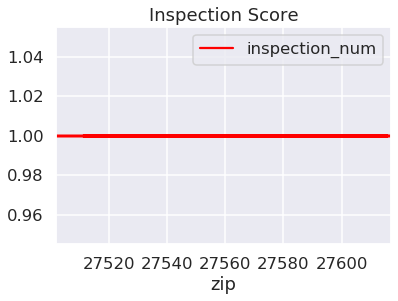

In [14]:
di = di_inspections.plot(x='zip', y='inspection_num', title = 'Inspection Score', color= 'red')

In the graph above, we see in these areas (zip code areas), they pretty much had the same inspection scores. Thus, showing how little importance health inspection scores have on the restaurant, especially in North Carolina.

In [15]:
# Here is the violations dataset. 
violations = 'violations.csv'

dv = pd.read_csv(violations)

dv

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189797,2144,4092015549,2014-09-10T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found a few un...,0,Out,CDI,NaN,NaN,NaN
189798,2145,4092016135,2014-09-11T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",James Smith,7-102.11; Priority Foundation; Spray bottle o...,1,Out,R,NaN,NaN,NaN
189799,2146,4092020997,2014-09-12T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Andrea Anover,7-102.11; Priority Foundation; 1 bottle of oil...,0,Out,CDI,NaN,NaN,NaN
189800,2147,4092021798,2014-09-19T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Thomas Jumalon,7-102.11; Priority Foundation; REQUIRES CHEMC...,1,Out,NaN,NaN,NaN,NaN


In [16]:
# I merged the inspections dataset with the violations dataset.

dfinal = pd.merge(di_inspections, dv, on= 'hsisid')

dfinal

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,severity,shortdesc,inspectedby_y,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,Melissa Harrison,3-603.11; Priority Foundation; Establishment f...,0,Out,CDI,NaN,NaN,NaN
1,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Priority Foundation,"Compliance with variance, specialized process,...",Melissa Harrison,Pf - 3-502.11 Variance Requirement - Establish...,0,Out,CDI,NaN,NaN,NaN
2,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,Melissa Harrison,Pf - 3-603.11 Consumption of Animal Foods that...,0,Out,R,NaN,NaN,NaN
3,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,Melissa Harrison,Pf - 3-603.11 Consumption of Animal Foods that...,0,Out,VR,NaN,NaN,NaN
4,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Core,"Compliance with variance, specialized process,...",Melissa Harrison,Raw fish is used for sushi (sushi chef not pre...,0,Out,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,4092013101,2012-10-02T00:00:00Z,CAPITAL CITY CHOP HOUSE,151 AIRGATE DR,NaN,morrisville,NC,27560-8495,(919) 484-7721,2000-02-02T00:00:00Z,...,Core,"Equipment, food & non-food-contact surfaces ap...",Angela Myers,4-501.12; Both Red Cuttingboards are in bad re...,0,Out,NaN,NaN,NaN,NaN
4599,4092013101,2012-10-02T00:00:00Z,CAPITAL CITY CHOP HOUSE,151 AIRGATE DR,NaN,morrisville,NC,27560-8495,(919) 484-7721,2000-02-02T00:00:00Z,...,Core,"Equipment, food & non-food-contact surfaces ap...",Angela Myers,4-501.11; Replace rusty refrigerator shelves. ...,1,Out,NaN,NaN,NaN,NaN
4600,4092013101,2012-10-02T00:00:00Z,CAPITAL CITY CHOP HOUSE,151 AIRGATE DR,NaN,morrisville,NC,27560-8495,(919) 484-7721,2000-02-02T00:00:00Z,...,Core,Non-food contact surfaces clean,Angela Myers,4-602.13; Remove unclean build-up from walk-in...,0,Out,NaN,NaN,NaN,NaN
4601,4092013101,2012-10-02T00:00:00Z,CAPITAL CITY CHOP HOUSE,151 AIRGATE DR,NaN,morrisville,NC,27560-8495,(919) 484-7721,2000-02-02T00:00:00Z,...,Core,Non-food contact surfaces clean,Angela Myers,"4-602.13; Rolling Cart is moldy, unclean. She...",0,Out,NaN,NaN,NaN,NaN


In [17]:
#drop duplicate rows

dfinal = dfinal.drop_duplicates(subset='name', keep ='first')
dfinal

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,severity,shortdesc,inspectedby_y,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,Melissa Harrison,3-603.11; Priority Foundation; Establishment f...,0,Out,CDI,NaN,NaN,NaN
108,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,Priority Foundation,"Toxic substances properly identified, stored, ...",Naterra McQueen,7-102.11; Priority Foundation; There were two ...,0,Out,CDI,NaN,NaN,NaN
167,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,Priority,"Management, employees knowledge; responsibilit...",Anne Bartoli,The facility does not have a health policy yet...,0,Out,CDI,NaN,NaN,NaN
239,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,Priority,"Toxic substances properly identified, stored, ...",Thomas Jumalon,7-201.11; Priority; SANI BUCKETS ON PREP SURF...,0,Out,NaN,NaN,NaN,NaN
312,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,...,Priority Foundation,"Management, employees knowledge; responsibilit...",David Adcock,2-103.11 (M) An employee health policy is now ...,1,Out,NaN,NaN,NaN,NaN
424,4092013281,2012-09-24T00:00:00Z,Taste Of China,1321 5TH AVE,NaN,garner,NC,27529-3637,(919) 779-7727,2001-02-19T00:00:00Z,...,Priority,"Toxic substances properly identified, stored, ...",Anne Bartoli,Cleaners were stored on the same shelf with op...,1,Out,CDI,NaN,NaN,NaN
506,4092012132,2012-09-25T00:00:00Z,Applebee's #329,1165 US 70 HWY W,NaN,garner,NC,27529-2547,(919) 661-9505,1997-09-25T00:00:00Z,...,Core,Plumbing installed; proper backflow devices,Caroline Suggs,5-205.15 (A)(B); Core; The floor drain under t...,0,Out,NaN,NaN,NaN,NaN
614,4092012996,2012-09-25T00:00:00Z,Glenaire Dining Services,4000 Glenaire Circle,NaN,cary,NC,27511-3802,(919) 447-4482,1999-08-19T00:00:00Z,...,Priority,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-201.11; Priority - In several different area...,1,Out,CDI,NaN,NaN,NaN
744,4092013641,2012-09-25T00:00:00Z,California Pizza Kitchen,5959 Triangle Town Center RD,Ste 2121,raleigh,NC,27616,(919) 792-0333,2002-08-09T00:00:00Z,...,NaN,Proper cooling methods used; adequate equipmen...,Johanna Farmer,3-501.15; Repeat Violation-Four containers of ...,1,Out,R,NaN,NaN,NaN
891,4092014979,2012-09-25T00:00:00Z,Jasmin Mediterranean Bistro,2430 Hillsborough ST,NaN,raleigh,NC,27607,(919) 755-9991,2007-10-22T00:00:00Z,...,Priority Foundation,"Toxic substances properly identified, stored, ...",Laura McNeill,7-102.11; Priority Foundation; two chemical bo...,1,Out,CDI,NaN,NaN,NaN


In the table above, I removed duplicate rows, to narrow down the data and make it easier to read. These restaurants had inspections and health code violations.

In [18]:
# Now here is the restaurants dataset.
restaurants = 'restaurants.csv'
dh = pd.read_csv(restaurants)

dh

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,2996,4092016658,LA ROMA PIZZA,1322 FIFTH AVE,NaN,GARNER,NC,27529,(919) 662-1700,2014-04-03T00:00:00.000Z,Restaurant,-78.621859,35.709485,M
3320,2997,4092016663,BOJANGLES #5,3301 S WILMINGTON ST,NaN,RALEIGH,NC,27603,(919) 772-4512,2014-04-08T00:00:00.000Z,Restaurant,-78.649803,35.735063,M
3321,2998,4092016557,BURGER KING #19795,22114 S MAIN ST,NaN,Wake Forest,NC,27587,(919) 556-7773,2013-10-31T00:00:00.000Z,Restaurant,0.000000,0.000000,U
3322,2999,4092017227,QUICKLY,4141 DAVIS DR,NaN,MORRISVILLE,NC,27560,(984) 465-0347,2016-05-19T00:00:00.000Z,Restaurant,-78.858116,35.835626,M


In [19]:
dh = dh[~dh['facilitytype'].astype(str).str.contains('Pushcarts')]
dh = dh[~dh['facilitytype'].astype(str).str.contains('Institutional Food Service')]
dh = dh[~dh['facilitytype'].astype(str).str.contains('Public School Lunchrooms')]
dh

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
6,1007,4092016679,BITTERSWEET,16 E MARTIN ST,NaN,RALEIGH,NC,27601,(919) 977-3829,2014-04-23T00:00:00.000Z,Restaurant,-78.640023,35.777143,M
7,1008,4092014493,Chick-fil-A #1573,8901 Brier Creek PKY,NaN,RALEIGH,NC,27617,(919) 293-0100,2006-01-31T00:00:00.000Z,Restaurant,-78.790500,35.901065,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,2996,4092016658,LA ROMA PIZZA,1322 FIFTH AVE,NaN,GARNER,NC,27529,(919) 662-1700,2014-04-03T00:00:00.000Z,Restaurant,-78.621859,35.709485,M
3320,2997,4092016663,BOJANGLES #5,3301 S WILMINGTON ST,NaN,RALEIGH,NC,27603,(919) 772-4512,2014-04-08T00:00:00.000Z,Restaurant,-78.649803,35.735063,M
3321,2998,4092016557,BURGER KING #19795,22114 S MAIN ST,NaN,Wake Forest,NC,27587,(919) 556-7773,2013-10-31T00:00:00.000Z,Restaurant,0.000000,0.000000,U
3322,2999,4092017227,QUICKLY,4141 DAVIS DR,NaN,MORRISVILLE,NC,27560,(984) 465-0347,2016-05-19T00:00:00.000Z,Restaurant,-78.858116,35.835626,M


In [20]:
# I merged restaurants with inspections based on the 'hsisid' column.

resta_inspect = pd.merge(dh, dfinal, on='address1')

resta_inspect

,X.objectid_x,hsisid_x,name_x,address1,address2_x,city_x,state_x,postalcode_x,phonenumber_x,restaurantopendate_x,...,severity,shortdesc,inspectedby_y,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,1175,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,RALEIGH,NC,27610,(919) 350-8047,2002-12-21T00:00:00.000Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,Melissa Harrison,3-603.11; Priority Foundation; Establishment f...,0,Out,CDI,NaN,NaN,NaN
1,1182,4092013892,O`Charley`s,8115 Brier Creek Pky,NaN,RALEIGH,NC,27617,(919) 484-4038,2003-09-04T00:00:00.000Z,...,Priority Foundation,Consumer advisory provided for raw or undercoo...,James Smith,3-603.11 Consumption of Animal Foods that are ...,0,Out,CDI,NaN,NaN,NaN
2,1328,4092013137,SUBWAY #22217,1601 CROSS LINK RD,NaN,RALEIGH,NC,27610-4186,(919) 835-1555,2000-03-20T00:00:00.000Z,...,Priority Foundation,"Toxic substances properly identified, stored, ...",Caroline Suggs,7-102.11; Priority Foundation; Some spray bott...,0,Out,CDI,NaN,NaN,NaN
3,1335,4092020980,Food Lion #1669 Deli,1601 CROSS LINK RD,NaN,RALEIGH,NC,27610-4186,(919) 633-8250,2000-03-15T00:00:00.000Z,...,Priority Foundation,"Toxic substances properly identified, stored, ...",Caroline Suggs,7-102.11; Priority Foundation; Some spray bott...,0,Out,CDI,NaN,NaN,NaN
4,1459,4092014182,NY Pizza,634 Holly Spring RD,NaN,HOLLY SPRINGS,NC,27540,(919) 567-0505,2004-11-05T00:00:00.000Z,...,Priority,"Toxic substances properly identified, stored, ...",Andrea Anover,7-204.11 ; Priority; KEEP SANITIZER PROPERLY M...,0,Out,CDI,NaN,NaN,NaN
5,1513,4092014184,"Hwy 55 Burgers, Shakes & Fries",1011 N. Smithfield RD,NaN,KNIGHTDALE,NC,27545,(919) 261-9841,2004-11-16T00:00:00.000Z,...,Priority Foundation,"Toxic substances properly identified, stored, ...",Naterra McQueen,7-102.11; Priority Foundation; The sanitizer b...,0,Out,CDI,NaN,NaN,NaN
6,1650,4092014509,Golden Corral #2485,11016 Capital BLVD,NaN,WAKE FOREST,NC,27587,(919) 570-2808,2006-02-24T00:00:00.000Z,...,NaN,Proper cooling methods used; adequate equipmen...,Naterra McQueen,The food was placed in the walk-in cooler to c...,0,Out,CDI,NaN,NaN,NaN
7,271,4092011235,Olive Garden,4805 Capital Blvd,NaN,RALEIGH,NC,27616-4483,(919) 954-8557,1993-03-09T00:00:00.000Z,...,NaN,"Compliance with variance, specialized process,...",Johanna Farmer,8-103.12; HACCP plan is not being properly fol...,0,Out,NaN,NaN,Food from Unsafe Source,Records
8,376,4092013670,Cracker Barrel #461,955 AIRPORT BLVD,NaN,MORRISVILLE,NC,27560-9194,(919) 463-9222,2002-10-01T00:00:00.000Z,...,Priority Foundation,"Management, employees knowledge; responsibilit...",James Smith,2-103.11(M) Person in Charge-Duties - PIC abl...,0,Out,CDI,NaN,NaN,NaN
9,438,4092013281,Taste Of China,1321 5TH AVE,NaN,GARNER,NC,27529-3637,(919) 779-7727,2001-02-19T00:00:00.000Z,...,Priority,"Toxic substances properly identified, stored, ...",Anne Bartoli,Cleaners were stored on the same shelf with op...,1,Out,CDI,NaN,NaN,NaN


# Data Cleaning

For data cleaning, I removed duplicate rows, columns that I did not need, and merge dataframes together based on same column name/values. 

From this, I found that the restaurants all had violated some health codes and I am able to see who the health inspector was who gaved the restaurant their health scores.

Text(0, 0.5, 'Number of Restaurants')

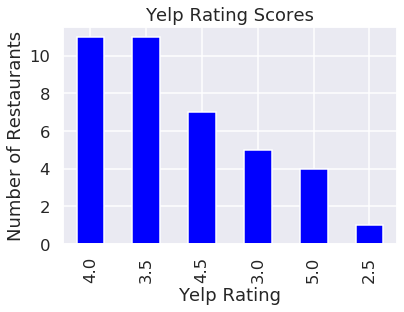

In [21]:
ye = dg_yelp['rating'].value_counts().plot.bar(title='Yelp Rating Scores', color='blue')
ye.set_xlabel("Yelp Rating")
ye.set_ylabel("Number of Restaurants")

In [22]:
dg_yelp['rating'].value_counts()

4.0    11
3.5    11
4.5     7
3.0     5
5.0     4
2.5     1
Name: rating, dtype: int64

Here we see that 11 restaurants had a 4.0 Yelp rating.
11 restaurants also had a 3.5 rating and 1 restaurant had a 1-star rating.

In [23]:
dfinal['inspectedby_y'].value_counts()

Tim Bass              7
David Adcock          5
James Smith           5
Andrea Anover         4
Lucy Schrum           4
Naterra McQueen       3
Anne Bartoli          3
Angela Myers          3
Caroline Suggs        3
Christopher Walker    3
Johanna Farmer        2
Jennifer Edwards      2
Melissa Harrison      2
Laura McNeill         2
Thomas Jumalon        1
Dimitri Parker        1
Name: inspectedby_y, dtype: int64

In [24]:
dfinal_percentage = dfinal['inspectedby_y'].value_counts(normalize=True)*100
dfinal_percentage

Tim Bass              14.0
David Adcock          10.0
James Smith           10.0
Andrea Anover          8.0
Lucy Schrum            8.0
Naterra McQueen        6.0
Anne Bartoli           6.0
Angela Myers           6.0
Caroline Suggs         6.0
Christopher Walker     6.0
Johanna Farmer         4.0
Jennifer Edwards       4.0
Melissa Harrison       4.0
Laura McNeill          4.0
Thomas Jumalon         2.0
Dimitri Parker         2.0
Name: inspectedby_y, dtype: float64

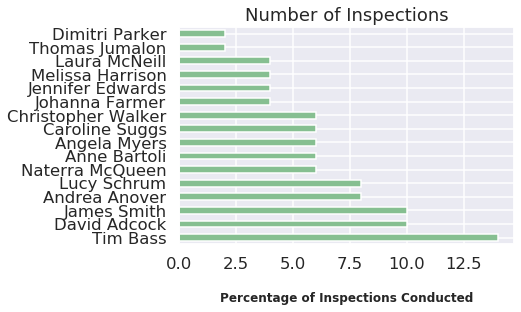

In [25]:
dfinal_percentage = dfinal_percentage.plot(kind='barh', color = '#86bf91', title = 'Number of Inspections')
dfinal_percentage = dfinal_percentage.set_xlabel("Percentage of Inspections Conducted", labelpad=20, weight='bold', size=12)

In the graph above, we see how many restaurant inspections were conducted by each health inspector. I created this table because I want to note the biases that occur from this. These health inspectors hold power in that they can control the outcome of the restaurant- will business be affected by a poor inspection score from a human who carries biases?

# Data Analysis & Results

I have found that Yelp reviews and ratings do not have a correlation with health inspection scores. As can see above, even though restaurants had violated some health codes, their businesses were still continuing along and functioning fine. 

Also from the data, I have noticed that not many restaurants had more than one health inspection, thus implying that health inspection is not 

# Ethics & Privacy

There are some issues with biases in the yelp data. The yelp data does not provide specific reasoning as to why those specific restaurants got their respective ratings. In addition, we do not know who made those reviews. Though this is good for privacy reasons. The individuals who rated the restaurants are not exposed and won't be targeted if they gave low ratings.

Furthermore, the is done by people who biases and also uses data, which have biases. The inspections conducted by health inspectors also carry biases. For example, if a health inspector have a grudge against a specific cuisine, they might be likely to pick out flaws and faults and give that restaurant a terrible health score, which can affect the business as a whole. 

Also different cities have different health inspection policies. For example, New York City restaurants has more frequent visits from health inspectors due to the city being heavily populated and with more a larger population, there are higher chances of contamination and food-borne outbreaks. On the otherhand, North Carolina restaurants have fever visits from health inspectors, and that could be because of their state health policies as well as having a smaller population than New York City.

Who are the stakeholders affected by my experiment? In my experiment, the data provided is made public and I am using the data that is public and shaping it to prove my hypothesis. It is not my intention to defame any restaurants or any specific health inspector.

In terms of data, I only have data from North Carolina, and I collected background information of restaurants and health policies for New York City. The health inspections data can be bias because first, the data is created by humans and sometimes, the state does not want to ruin their name and thus only show to the public restaurants that have small-scaled violations.

I cannot guarantee full privacy, because these data can be found on health inspection websites and Yelp.

Lastly, the inspection score and yelp reivew does not entirely define the sucess of a restaurant. Instead it only displays their flaws and areas that need improvement, not areas where they are doing well.

# Conclusion & Discussion

In conclusion, yelp ratings and health inspection scores are not correlated. Before my experiment, I presumed that lower yelp ratings would result in lower health inspection scores, and vice versa. However that is not the case. It is common for a restaurant with a C grade inspection score to acheive a 4-5 star ratings in a yelp review. Even with a low inspection score, the restaurant's business is not entirely affected and the restaurant can still have a high yelp review rating. 

Some limitations that I faced during this project and experiment is that the data was limited in that I had a difficult time comparing two varibales statisically because there was very little numeric values. I was able to generate numeric values from the data and have found that inspection score and yelp ratings are not correlated. Another limitation I encountered has to be the duplicate information in the datasets. I found it difficult to have to filter through the rows/columns to get rid of duplicates. Also, not all the columns were filled in, meaning that some data was missing for some restaurants.

Secondly, I do not evaluate this as a successful project, but I do think there are some small accomplishements, such as being able to see how location does affect the amount of reviews generated for a restaurant, how low yelp reviews doesn't mean a restaurant is terrible, or how a low inspection score doesn't define the sucess of a restaurant. 

Some covariates I wish to measure is what the yelp reviews/ratings were during the time of the restaurant's health inspection. The current ratings are a general rating of the restaurant without acknowledging when in the timeline the rating was given. The health inspections scores data have the date when the inspection was performed except does not help in that there were no past or future inspections.

For the future, I can do further analysis on analyzing review comments and try to find why some restaurants have good reviews but low inspection scores and vice versa.